### Zulema Perez

### CPSC 585 

### Project 5: Advanced Training and Tuning on the EMINST Dataset

In [ ]:
import sys

from google.colab import drive

drive.mount('/content/drive')
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/')

Mounted at /content/drive


In [ ]:
import numpy as np

#from google.colab import files
#data_to_load = files.upload()

path = '/content/drive/MyDrive/emnist_letters.npz'
# load EMINST data
with np.load(path, allow_pickle=True) as data:
  x_train = data['train_images']
  y_train = data['train_labels']
  x_test = data['test_images']
  y_test = data['test_labels']
  x_validate = data['validate_images']
  y_validate = data['validate_labels']


In [ ]:
print(x_train.shape)
print(x_train)
x_train

(104000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(y_train.shape)
print(len(y_train))

(104000, 27)
104000


In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
print(x_test.shape)

(20800, 784)


In [ ]:
print(y_test.shape)
print(len(y_test))

(20800, 27)
20800


In [ ]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

#### **Experiment 1**

Use plt.imshow() to verify that the image data has been loaded correctly and that the corresponding labels are correct.

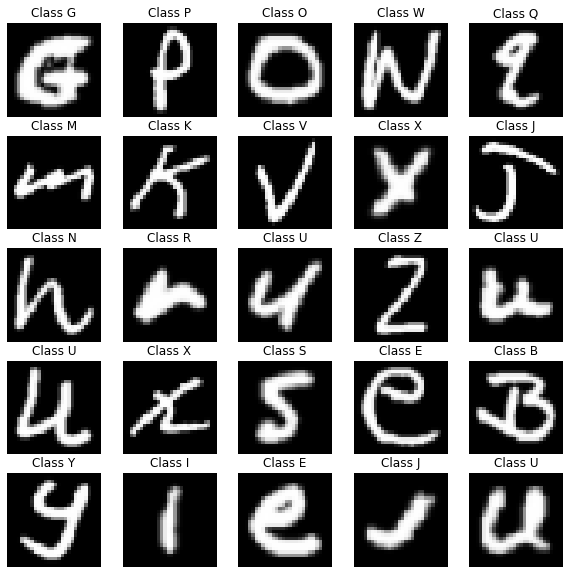

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))

cols = 5
rows = 5

for i in range(1, (cols*rows) + 1):
  fig.add_subplot(rows, cols, i)
  plt.axis('off')
  plt.title("Class {}".format(chr(np.argmax(y_train[i])+64)))
  plt.imshow(x_train[i].reshape([28,28]), cmap='Greys_r', interpolation='none')
plt.show()


#for i in range(15):
  #print(chr(np.argmax(y_train[i])+64))


#### **Experiment 2**

Begin by applying the network architecture from Chollet’s MNIST notebook to the EMNIST Letters data. 

**What accuracy do you achieve?**

Accuracy for EMNIST:

For the training dataset - Accuracy: 0.9772

For the test dataset - Accuracy: 0.8799


**How does this compare with the accuracy for MNIST?**

Comparing the accuracy for MNIST:

For the training dataset - Accuracy: 0.9890

For the test dataset - Accuracy: 0.9777

The accuracy for MNIST is higher than the EMNIST accuracy for both training and test datasets.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import callbacks
from keras.layers import BatchNormalization
from keras.optimizers import Adam

model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(27, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=128)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_68 (Dense)             (None, 27)                13851     
Total params: 415,771
Trainable params: 415,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
813/813 [==============================] - 7s 8ms/step - loss: 1.0824 - accuracy: 0.6881
Epoch 2/20
813/813 [==============================] - 7s 8ms/step - loss: 0.4013 - accuracy: 0.8759
Epoch 3/20
813/813 [==============================] - 7s 8ms/step - loss: 0.3048 - accuracy: 0.9029
Epoch 4/20
813/813 [==============================] - 7s 8ms/step - loss: 0.2613 - accuracy: 0.9168
Epoch 5/20
813/813 [==============================] - 7s 8ms/step - loss: 0.2279 - accuracy: 0.9247
Epoch 6/2

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

650/650 [==============================] - 1s 2ms/step - loss: 0.4789 - accuracy: 0.9010


In [ ]:
print('Test Accuracy: ', test_acc)

Test Accuracy:  0.9010096192359924




```
# This is formatted as code
```

#### **Experiment 3**

Keeping the same number of layers in the network (i.e. an MLP with a single hidden layer), modify the architecture to improve the accuracy. You will need to decide on an appropriate number of neurons in the hidden layer. Keep in mind that:

There are 27 classes rather than 10, so you will need a larger hidden layer than the MNIST network.

In addition to having more classes, EMNIST Letters mixes upper- and lowercase letters within each class, so even with enough neurons in the hidden layer, your accuracy is likely to be lower.  See the details in the EMNIST paper for the kind of performance you might reasonably expect.

The Keras fit() method can take a validation_data parameter in order to evaluate metrics on the validation set.



In [ ]:
model_2 = keras.Sequential()
model_2.add(layers.Dense(2048, activation='relu', input_shape=(784,)))
model_2.add(layers.Dense(27, activation='softmax'))
model_2.summary()

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(x_train, 
           y_train,
           epochs=15,
           validation_data=(x_validate, y_validate),
           batch_size=128,
)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_57 (Dense)             (None, 27)                55323     
Total params: 1,663,003
Trainable params: 1,663,003
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
813/813 [==============================] - 20s 24ms/step - loss: 0.9355 - accuracy: 0.7272 - val_loss: 0.3773 - val_accuracy: 0.8850
Epoch 2/15
813/813 [==============================] - 19s 24ms/step - loss: 0.3278 - accuracy: 0.8961 - val_loss: 0.3267 - val_accuracy: 0.9000
Epoch 3/15
813/813 [==============================] - 19s 24ms/step - loss: 0.2450 - accuracy: 0.9187 - val_loss: 0.3037 - val_accuracy: 0.9059
Epoch 4/15
813/813 [==============================] - 19s 24ms/step - los

In [ ]:
test_loss_2, test_acc_2 = model_2.evaluate(x_test, y_test)

650/650 [==============================] - 3s 4ms/step - loss: 0.3853 - accuracy: 0.9141


In [ ]:
print('Test Accuracy: ', test_acc_2)

Test Accuracy:  0.9140865206718445


#### **Experiment 4**

Once you have settled on the size of the hidden layer, use the techniques you learned in Chapters 3 and 4 of the textbook to obtain the highest accuracy you can on the validation set. These might include:

Preprocessing

Weight initialization

Choice of activation function *

Optimizer *

Batch Normalization

Regularization

Data augmentation

Dropout *

Early Stopping *

You may find the slides for Chapter 3 helpful, particularly the presentation “Neural Network Training [Initialization, Preprocessing, Mini-Batching, Tuning, and Other Black Art].”

In [ ]:
from keras.optimizers import RMSprop

model_3 = keras.Sequential()
model_3.add(layers.Dense(2048, activation='sigmoid', input_shape=(784,)))
model_3.add(layers.Dropout(0.5))
#model_3.add(BatchNormalization())
model_3.add(layers.Dense(27, activation='softmax'))
model_3.summary()

earlystopping = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    mode = 'auto'
)

model_3.compile(optimizer= Adam(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train, 
           y_train,
           epochs=35,
           validation_data=(x_validate, y_validate),
           batch_size=128,
           callbacks = [earlystopping],
)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dropout_25 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 27)                55323     
Total params: 1,663,003
Trainable params: 1,663,003
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
813/813 [==============================] - 23s 28ms/step - loss: 1.5729 - accuracy: 0.5447 - val_loss: 0.8160 - val_accuracy: 0.7648
Epoch 2/35
813/813 [==============================] - 23s 28ms/step - loss: 0.7802 - accuracy: 0.7667 - val_loss: 0.5650 - val_accuracy: 0.8340
Epoch 3/35
813/813 [==============================] - 23s 29ms/step - loss: 0.5662 - 

In [ ]:
test_loss_3, test_acc_3 = model_3.evaluate(x_test, y_test)

650/650 [==============================] - 3s 4ms/step - loss: 0.2806 - accuracy: 0.9183


In [ ]:
print('Test Accuracy: ', test_acc_3)

Test Accuracy:  0.9183173179626465


#### **Experiment 5**

Add additional Dense hidden layers as appropriate to improve the accuracy. Note that you may need to adjust your hyperparameters or other aspects of the network architecture in response to these changes. 

How does the accuracy for your deep network compare with the accuracy you achieved in experiment (4)?. 


In [ ]:

model_4 = keras.Sequential()
model_4.add(layers.Dense(1024, activation='sigmoid', input_shape=(784,)))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(1024, activation='sigmoid' ))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(27, activation='softmax'))
model_4.summary()

earlystopping_1 = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    mode = 'auto'
)

model_4.compile(optimizer=Adam(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_4.fit(x_train, 
           y_train,
           epochs=35,
           validation_data=(x_validate, y_validate),
           batch_size=128,
           callbacks = [earlystopping_1],
)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_26 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_27 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 27)                27675     
Total params: 1,881,115
Trainable params: 1,881,115
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
813/813 [==============================] - 34s 42ms/step - loss: 1.8817 - accuracy: 0.4513 - val_l

In [ ]:
test_loss_4, test_acc_4 = model_4.evaluate(x_test, y_test)

650/650 [==============================] - 4s 5ms/step - loss: 0.2379 - accuracy: 0.9262


In [ ]:
print('Test Accuracy: ', test_acc_4)

Test Accuracy:  0.926153838634491


#### **Experiment 6**

When finished tuning, evaluate your results on the test set. Compare the test performance of your original network from experiment (2) and the final networks for experiments (3) and (4).

Accuracy for Experiment (2) EMNIST:

For the training dataset - Accuracy: 0.9692

For the test dataset - Accuracy: 0.9010

Accuracy for Experiment (3) EMNIST:

For the training dataset - Accuracy: 0.9716

For the test dataset - Accuracy: 0.9141

Accuracy for Experiment (4) EMNIST:

For the training dataset - Accuracy: 0.9402

For the test dataset - Accuracy: 0.9183

Accuracy for Experiment (5) EMNIST:

For the training dataset - Accuracy: 0.9351

For the test dataset - Accuracy: 0.9262

In experiment (2) the training set accuracy was 0.9692 but the test dataset had an accuracy of 0.9010 which shows that the training dataset is overfitting and is not generalizing enough to recognize the new data in the test dataset.

The same thing happens in Experiment (3) with training accuracy of 0.9716 and test accuracy of 0.9141. In Experiment (4) the results look better in the sense that the training dataset Accuracy 0.9402 is closer to the test dataset accuracy 0.9183 which does a better job of not overfitting and shows it did a better job generalizing while training.

Over all Experiment (5) had the best performance with accuracy for both training dataset with accuracy of 0.9351 and test dataset of 0.9262 with not much a difference in percentage. Did not seem to overfit the dataset and seems to have generalized the data while learning, this can be seen by observing that there is not a huge gap in the accuracy of the training and test datasets.


#### **Experiment 7**

Use plt.imshow() to view some of the misclassified images and examine their labels. Describe what you think might have gone wrong.

Based on the sample of misclassified images below it seems that the neural network could not distinguish some letters that looked similar to other letters or are written poorly enough not to be recongized by the neural network. The accuracy of the neural netwrok could be improved by using a CNN.

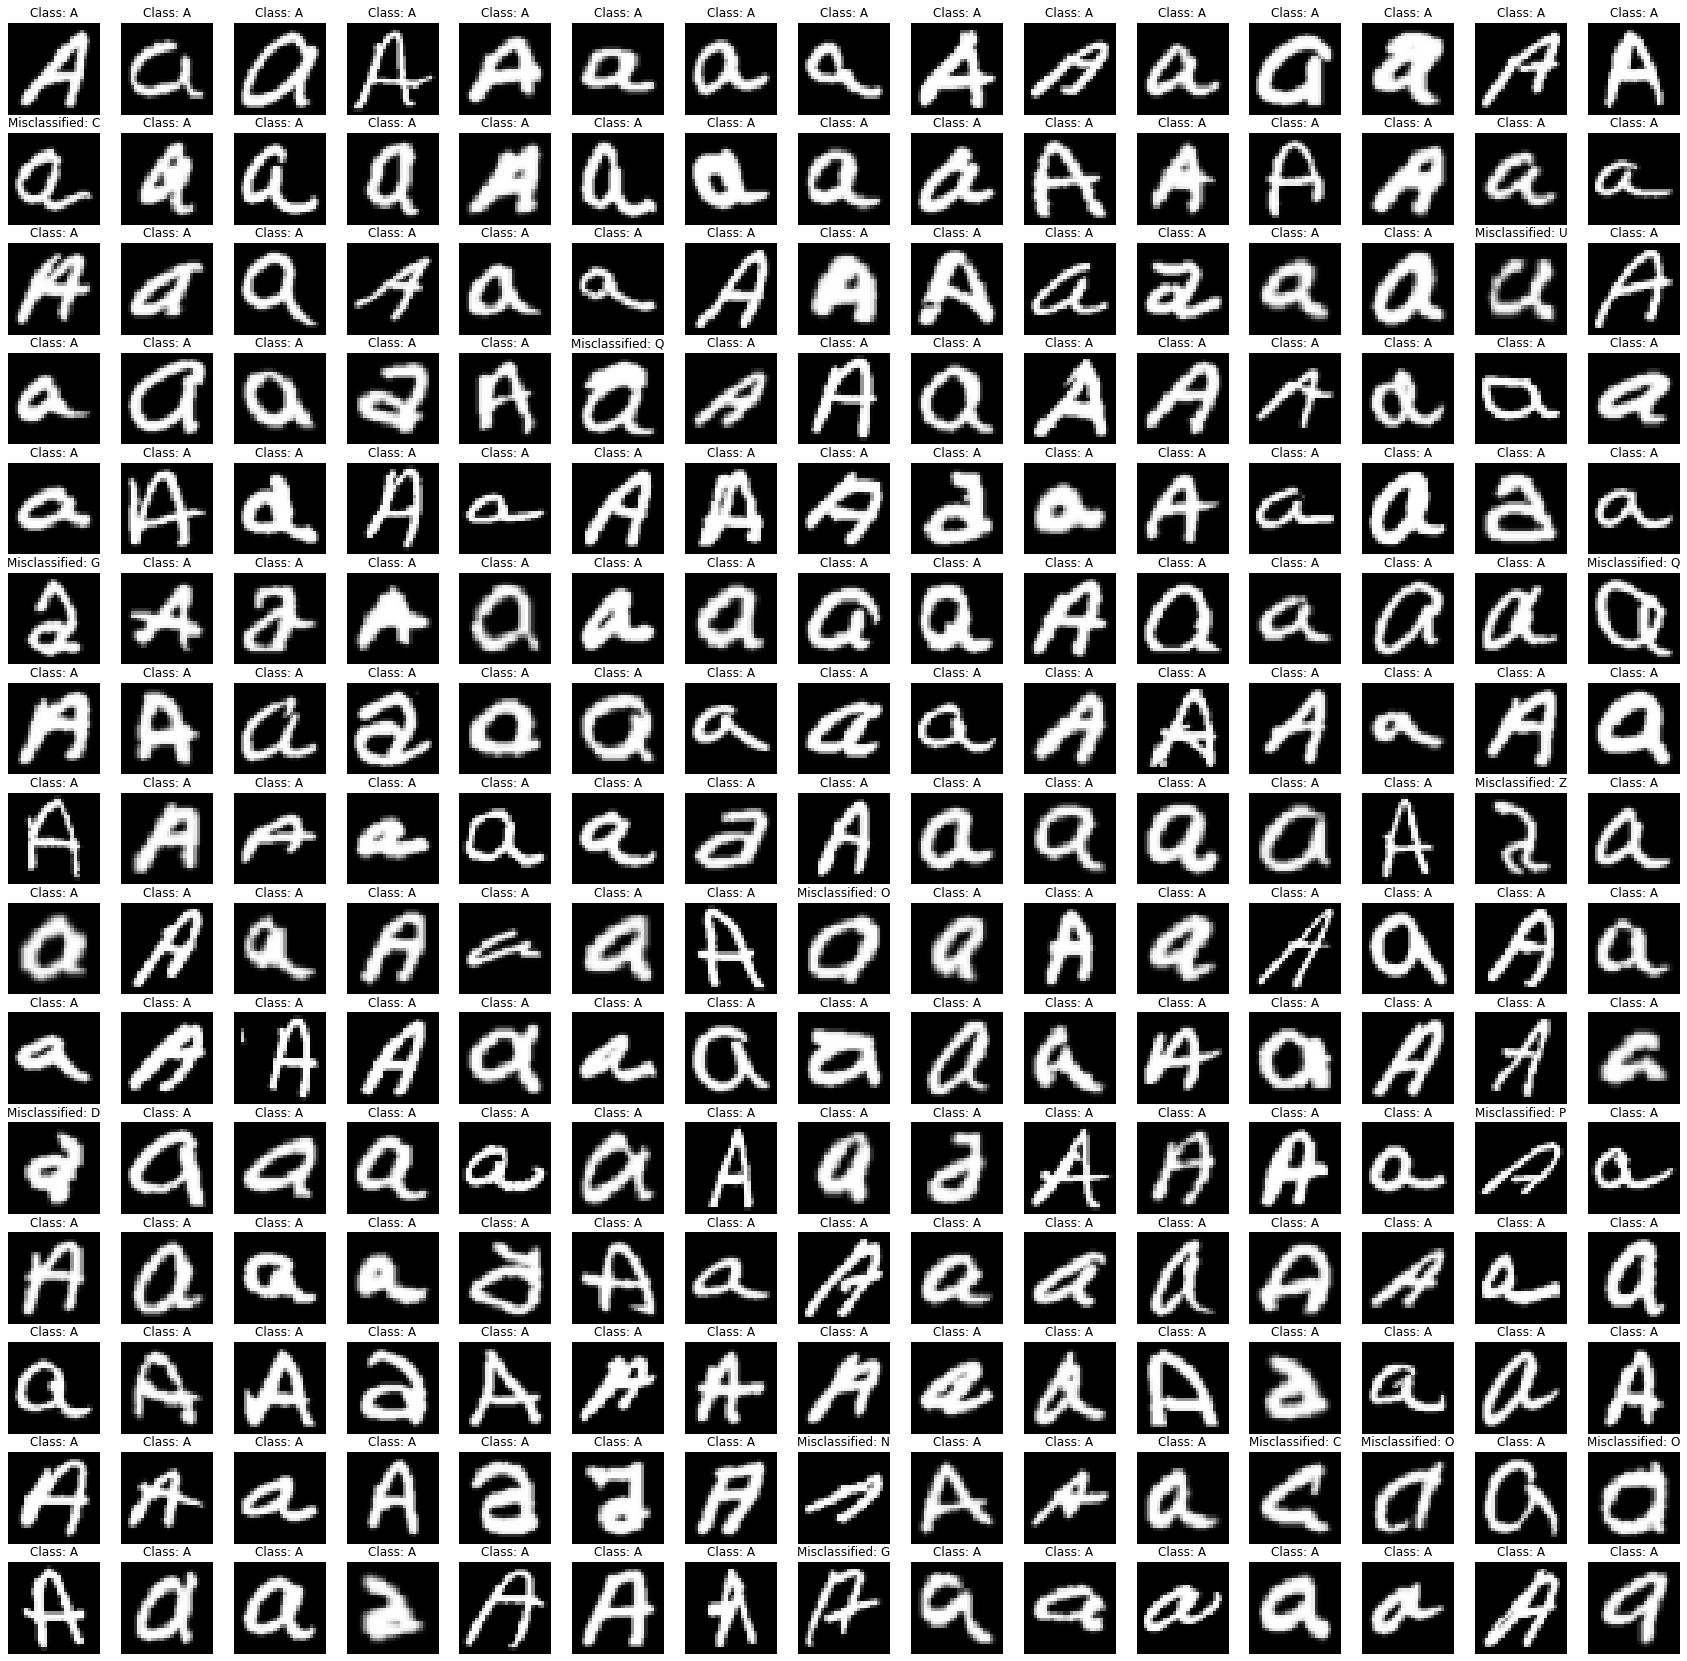

In [ ]:
predicted_test = np.array([])
predicted_test = model_4.predict(x_test[:])

fig1 = plt.figure(figsize=(30,30))

cols1 = 15
rows1 = 15

for i in range(1,rows1*cols1 + 1):
  if (np.argmax(predicted_test[i])+64) != (np.argmax(y_test[i])+64):
    fig1.add_subplot(rows1, cols1, i)
    plt.axis('off')
    plt.title("Misclassified: {}".format(chr(np.argmax(predicted_test[i])+64)))
    plt.imshow(x_test[i].reshape([28,28]), cmap='Greys_r', interpolation='none')
  else:
    fig1.add_subplot(rows1, cols1, i)
    plt.axis('off')
    plt.title("Class: {}".format(chr(np.argmax(y_test[i])+64)))
    plt.imshow(x_test[i].reshape([28,28]), cmap='Greys_r', interpolation='none')
    
plt.show()